# Intro to Sklearn

This notebook is a resource for you to use when learning your way around the Scikit Learn library. 
Below I've demonstrated some of the functions we will use most frequently in this course. (Please be forgiving of any spelling errors I've made throughout this notebook- markdown doesn't have spellcheck (: ).

Here are some great adittional resources that I definetly reccomend checking out:
- [Scikit Learn: Getting Started](https://scikit-learn.org/stable/getting_started.html)
- [Tutorials Point: Scikit Learn](https://www.tutorialspoint.com/scikit_learn/index.htm)
- [fkromer on GitHub: awesome-scikit-learn](https://github.com/fkromer/awesome-scikit-learn#examples)

<b>Before getting started</b>:

Make sure you have the proper dependecy versions & that you have installed the scikit-learn library itself in your commandline. See more instructions on how to do that [here](https://scikit-learn.org/stable/install.html#installation-instructions).

### Importing Datasets

Most of the time, you will be provided with the dataset you are to use for a given assignment. Scikit Learn also has built in datasets you can use for testing, though. Below is how you can load in a dataset:

In [1]:
# importing 'load_diabetes' function from sklearn
from sklearn.datasets import load_diabetes

# use the 'load_diabetes' function to load the Diabetes dataset (this is a regression dataset, which is why I picked it)
dataset = load_diabetes() 

It's important to know that the datasets this course deals with are composed of two main parts- <b>features</b> and <b>labels</b>.

- <b>Features</b> are the characteristics or properties of the data. They can pretty much describe anything.
- <b>Labels</b> are the classifications given to datapoints based on their features- this is what we predict using models.

Here is some information about the [Diabetes dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes) specifically:

- Number of Instances: 442

- Number of Attributes: First 10 columns are numeric predictive values

- Target: Column 11 is a quantitative measure of disease progression one year after baseline

- Attribute Information:
    - age age in years
    - sex
    - bmi body mass index
    - bp average blood pressure
    - s1 tc, total serum cholesterol
    - s2 ldl, low-density lipoproteins
    - s3 hdl, high-density lipoproteins
    - s4 tch, total cholesterol / HDL
    - s5 ltg, possibly log of serum triglycerides level
    - s6 glu, blood sugar level

In [2]:
# split the dataset into its X & y components 
X = dataset.data
y = dataset.target # NOTE: target & label are terms used interchangebly 

'''
NOTE: Since you will usually be given a csv file containing the data for an assignment, you will just have to slice the dataframe
      using your numpy/pandas skills into it's features and labels columns. 
      
      Here is an example of this where there is both just one column of features and labels:

      dataset = pd.read_csv('provided_dataset.csv')
      X = data[['Features Column']]
      y = data[['Labels Column']]
'''

# This step is *exclusive* to the Scikit Learn datasets, getting the feature names 
print("Feature names:", dataset.feature_names) 

# displaying the head of the labels & features to get a scope of the data
print(f"\nHead of X:\n {X[:5]}")
print(f"\nHead of y:\n", y[:5]) 

Feature names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

Head of X:
 [[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990749 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632753 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06833155 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567042 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286131 -0.02593034]
 [-0.08906294 -0.04464164 -0.01159501 -0.03665608  0.01219057  0.02499059
  -0.03603757  0.03430886  0.02268774 -0.00936191]
 [ 0.00538306 -0.04464164 -0.03638469  0.02187239  0.00393485  0.01559614
   0.00814208 -0.00259226 -0.03198764 -0.04664087]]

Head of y:
 [151.  75. 141. 206. 135.]


### Splitting Datasets

Before training any model, you have to split the dataset into <b>training</b> and <b>testing</b> portions. The most common split is 70% (training) to 30% (testing). I reccomend you use this ratio unless instructed otherwise. 

The uses of the split datasets are pretty straightforward- the training data is for training a given model & the testing is used to check the accuracy of the model after training. 

In [3]:
# import the 'train_test_split' function from sklearn
from sklearn.model_selection import train_test_split

# use the 'train_test_split' function 
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state = 42) # splitting the the variables X & y so that 30% is testing
                                                                                               # this also means the other 70% will be training 

print(f"X train shape: {X_train.shape}")
print(f"X test shape: {X_test.shape}")

print(f"\ny train shape: {y_train.shape}")
print(f"y test shape: {y_test.shape}")

X train shape: (309, 10)
X test shape: (133, 10)

y train shape: (309,)
y test shape: (133,)


Note how **y** has no number in the column positiion of its shape. This is because **y** is representing the **'labels'** of this dataset. The labels classify each row (an object) with the characteristics of the **features** contained in the **X** variable. 

For the rest of this example, I am going to use only **one** feature. This will simplify the process of plotting results later. The feature I chose to use is **BMI** (but you can replace the index below with one for another feature if you want to experiment w/ results).

In Machine Learning, it is also common to pick & choose columns from a dataset that best represent the relationship you are trying to show/prove. You can even create new columns from the pre-existing data. This is called **feature engineering**. 

In [4]:
import numpy as np

X_train = X_train[:, np.newaxis, 2] # Use only one feature 
X_test = X_test[:, np.newaxis, 2] # Use only one feature 

print(f"X train shape: {X_train.shape}")
print(f"X test shape: {X_test.shape}")

print(f"\ny train shape: {y_train.shape}")
print(f"y test shape: {y_test.shape}")

X train shape: (309, 1)
X test shape: (133, 1)

y train shape: (309,)
y test shape: (133,)


### Instatinating Algorithims 

Since the dataset I used for this notebook was curated for regression, I will be using the [**Linear Regression**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression) model for the following example.

In [5]:
# import the 'LinearRegression' model from sklearn 
from sklearn.linear_model import LinearRegression

In [6]:
# Create the linear regression object
linreg = LinearRegression()

# Train the model using the training sets
linreg.fit(X_train, y_train)

# Use the model to make predictions using the testing set
y_pred = linreg.predict(X_test)

Predictions have been made on the data using the model, so now we can view the linear relationship found!

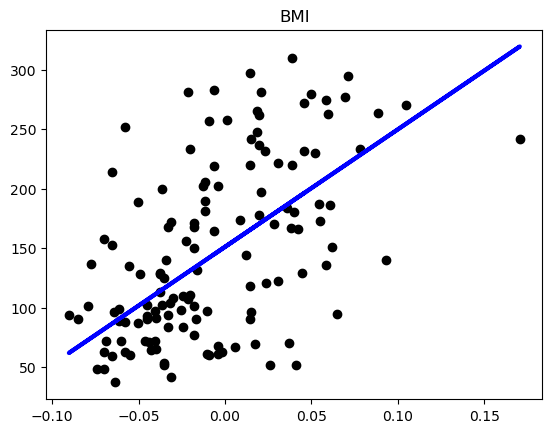

In [7]:
import matplotlib.pyplot as plt

plt.title("BMI")  # titling plot w/ corresponding name
plt.scatter(X_test, y_test, color="black")  # scattering original data
plt.plot(X_test, y_pred, color="blue", linewidth=3)  # drawing line with predicted data

### Getting Metrics

Once you fit a model, it is very important to run metric evaluations on them in order to see how well your model performs. There are a couple different metric tests we will use in this course. If you want to read more about all of the metrics provided to you by sklearn, visit [here](https://scikit-learn.org/stable/modules/model_evaluation.html). 

Here are some of the most important evaluations we will be using on **regression algorithims**:


- **Mean Squared Error (MSE)**: It measures the average of the squares of the errors or deviations, that is, the difference between the estimator and what is estimated. It gives more weight to larger errors. A lower MSE indicates a better fit.

- **Root Mean Squared Error (RMSE)**: It is the square root of the MSE. RMSE is in the same unit as the response variable, which makes it easier to interpret. Like MSE, a lower RMSE indicates a better fit.

- **R-squared (coefficient of determination)**: It measures the proportion of the variance in the dependent variable that is predictable from the independent variable(s). A higher R-squared value indicates a better fit.


and for **classification algorithims**:


- **Accuracy**: It measures the proportion of correct predictions out of the total predictions. However, it may not be suitable for imbalanced datasets.

- **Precision**: It indicates the proportion of true positive predictions out of all positive predictions made by the model. It is useful when the cost of false positives is high.

- **Recall (Sensitivity)**: It measures the proportion of true positive predictions out of all actual positive instances. It is useful when the cost of false negatives is high.

- **F1 Score**: It is the harmonic mean of precision and recall, providing a balance between the two metrics. It is suitable for imbalanced datasets.

- **Confusion Matrix**: A table that presents the model's predictions against the actual outcomes, showing true positives, true negatives, false positives, and false negatives.


(you will learn more about all of these terms in class)!

In [8]:
# since the model we used for this example is a regression model, lets look at the first 3 evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score

print(f"RMSE score: {np.sqrt(mean_squared_error(y_test,y_pred))}on a mean value of y: {y.mean()}")

print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred)) # (a score of 1 indicates perfect prediction)

RMSE score: 62.32926055201547on a mean value of y: 152.13348416289594
Coefficient of determination: 0.28


These values can usually reflect what we see displayed on a graph. In this case, we see a large scattering of the original data that has a linear relationship, but is not fit too tightly to it. This is shown in the RMSE & R scores. 